# Linear regression from scratch

In [1]:
# This is a code to implement linear regression on a dataset from scratch

# Importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from time import sleep 

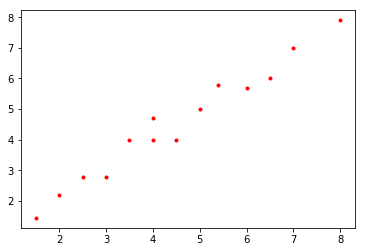

Dimensions of x: (14,)
Dimensions of y: (14,)


Dimensions of x after reshaping: (14, 1)
Dimensions of y after reshaping: (14, 1)
x:  [[2.  3.  4.5 6.  1.5 8.  7.  5.4 4.  6.5 5.  2.5 3.5 4. ]]


In [2]:
# Creating random dataset
x = np.array( [ 2, 3, 4.5, 6, 1.5, 8, 7, 5.4, 4, 6.5, 5, 2.5, 3.5, 4] )
y = np.array( [ 2.2, 2.8, 4, 5.7, 1.45, 7.9, 7, 5.8, 4.7, 6, 5, 2.8, 4, 4] )

# plotting the dataset
plt.plot(x, y, 'r.')
plt.show()

# printing dataset information and reshaping
print("Dimensions of x:", x.shape)
print("Dimensions of y:", y.shape)

x = x.reshape((x.shape[0], 1))
y = y.reshape((y.shape[0], 1))

print("\n")
print("Dimensions of x after reshaping:", x.shape)
print("Dimensions of y after reshaping:", y.shape)
print("x: ", x.T)

In [3]:
# Creating a dataset by concatenating x and y (Optional)
data = np.concatenate( (x,y), axis = 1 )
print(data)

#finding correlation between x and y 
np.corrcoef(np.transpose(data)) 

[[2.   2.2 ]
 [3.   2.8 ]
 [4.5  4.  ]
 [6.   5.7 ]
 [1.5  1.45]
 [8.   7.9 ]
 [7.   7.  ]
 [5.4  5.8 ]
 [4.   4.7 ]
 [6.5  6.  ]
 [5.   5.  ]
 [2.5  2.8 ]
 [3.5  4.  ]
 [4.   4.  ]]


array([[1.        , 0.98325052],
       [0.98325052, 1.        ]])

## Trivia!

### What does the correlation coefficient give you an insight about? Can you anticipate the results of regression?

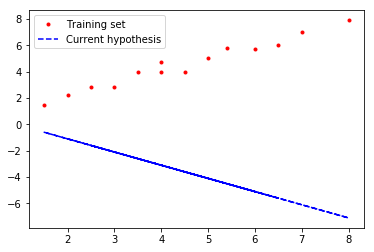


LOSS:  [[ -3.3   -4.9   -7.6  -10.8   -2.05 -15.   -13.1  -10.3   -7.8  -11.6
   -9.1   -4.4   -6.6   -7.1 ]]
8.117857142857144


In [4]:
# Defining hyper paramater theta (weights)

# Randomly initialising theta
theta = np.array([[0.9, -1]])
# print(theta.shape)

# creating bias vector x0
x0 = np.ones((x.shape[0], 1))

# forming input variable
X = np.concatenate((x0, x), axis = 1)
# print(X.shape)
# print(X)

# generating hypothesis, h
h = X.dot(theta.T)

# Plotting
plt.plot(x, y, 'r.', label = 'Training set')
plt.plot(x, h, 'b--', label = 'Current hypothesis')
plt.legend()
plt.show()

# printing overall loss
print("\nLOSS: ", (h - y).T)
print(np.sum(abs((h - y)) / len(X)))

In [5]:
def cost_function(X, y, theta):
    h = X.dot(theta.T)
    loss = h - y
    return h, np.sum(loss ** 2) / (2 * len(X))

# For testing the function
# print(cost_function(X, y, theta))

In [6]:
def grad_descent(X, y, theta, alpha):
    loss = (X.dot(theta.T) - y) 
    dj = loss.T .dot(X)
    
    theta_n = theta - alpha * dj
    return theta_n

# For testing the function
# print("theta before: ", theta)
# theta_n = grad_descent(X, y, theta, 0.005)
# print("theta after: ", theta_n)

Cost function:  17.12154592395019


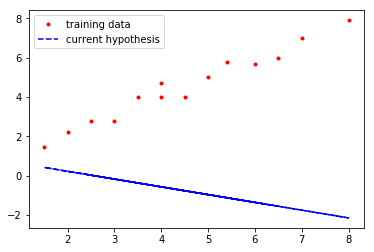

Cost function:  7.447289039487359


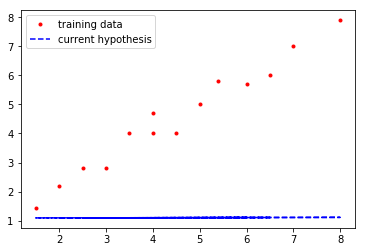

Cost function:  3.2766021775270318


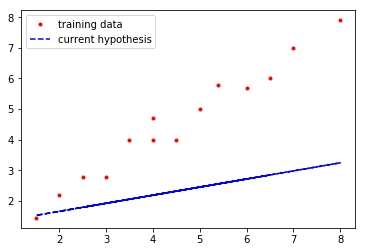

Cost function:  1.478488439626399


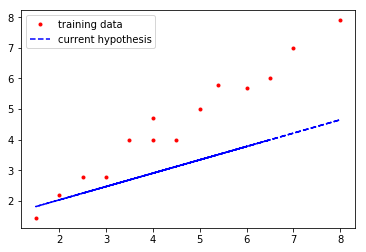

Cost function:  0.7031844383416457


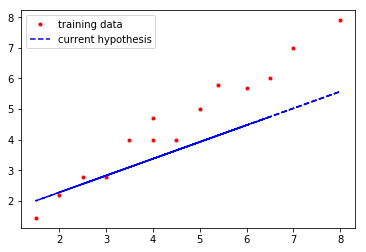

Cost function:  0.3688112178018579


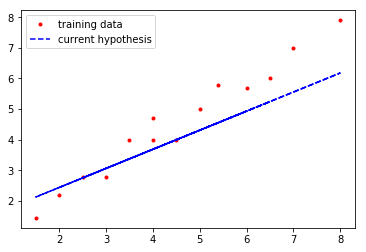

Cost function:  0.2245225006816845


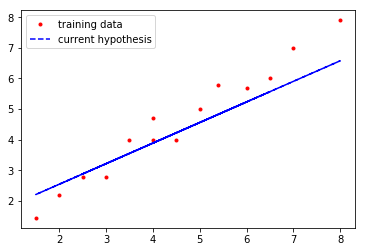

Cost function:  0.16217920589947268


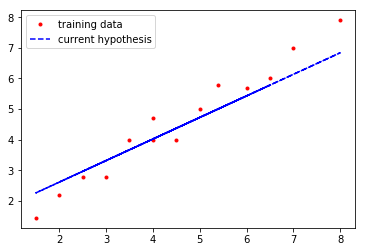

Cost function:  0.13516289725639527


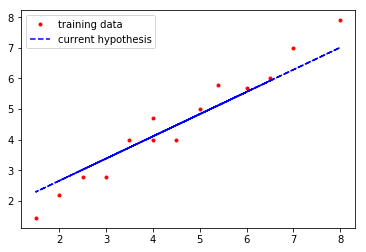

Cost function:  0.1233765043091035


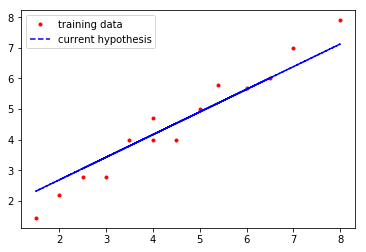

Cost function:  0.11815623796532024


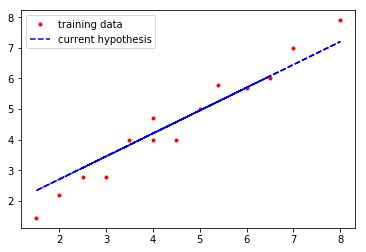

Cost function:  0.11576716248785542


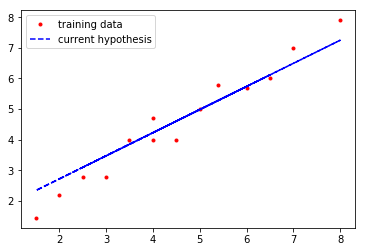

Cost function:  0.11459915606711646


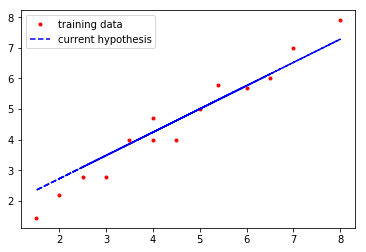

Cost function:  0.11395809782234738


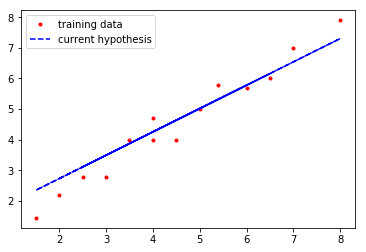

Cost function:  0.1135447521383823


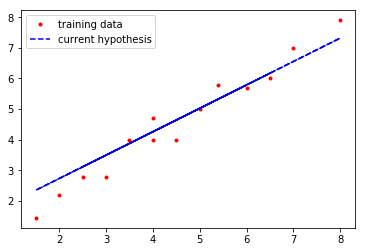

In [7]:
def linear_reg(epoch, X, y, theta, alpha):
    for ep in range(epoch):
        
        #calculate new theta
        theta = grad_descent(X, y, theta, alpha)
        
        #compute new loss
        h, loss = cost_function(X, y, theta)
        print("Cost function: ", loss)
        
        #plot
        plt.plot(x, y, 'r.', label = 'training data')
        plt.plot(x, h, 'b--', label = 'current hypothesis')
        plt.legend()
        plt.show()
        
        sleep(3)

# defining hyper parameters

# epochs are the number of times we run our linear regression to minimise the loss
# alpha is the learning rate

#Both epoch and alpha can be changed and tested on different numbers to minimise loss at a different rate(Advisable)
epoch = 15
alpha = 0.001
linear_reg(epoch, X, y, theta, alpha)